In [46]:
from  fiona import listlayers
import os

indiaMaps=os.path.join('maps','indiaMaps_24383.gpkg')

#layers del mapa 
listlayers(indiaMaps)

['airports',
 'states',
 'municipalities',
 'country',
 'cities',
 'rivers',
 'border']

In [47]:
# Leyendo la data:
import os
import geopandas as gpd

states=gpd.read_file(indiaMaps,layer='states')
municipalities=gpd.read_file(indiaMaps,layer='municipalities')
airports=gpd.read_file(indiaMaps,layer='airports')
rivers=gpd.read_file(indiaMaps,layer='rivers')
border=gpd.read_file(indiaMaps,layer='border')

In [48]:
import pandas as pd 

portsFile=os.path.join('data','UpdatedPub150.csv')

infoseaports=pd.read_csv(portsFile)
#columnas de datos de los aeropuertos
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [49]:
#Renombramos el Main Port Name por portName
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3739 non-null   object 
 1   Country Code  3739 non-null   object 
 2   Latitude      3739 non-null   float64
 3   Longitude     3739 non-null   float64
dtypes: float64(2), object(2)
memory usage: 117.0+ KB


In [50]:
# some rows
infoseaports.head()

,portName,Country Code,Latitude,Longitude
0,Maurer,United States,40.533333,-74.250000
1,Mangkasa Oil Terminal,Indonesia,-2.733333,121.066667
2,Iharana,Madagascar,-13.350000,50.000000
3,Andoany,Madagascar,-13.400000,48.300000
4,Chake Chake,Tanzania,-5.250000,39.766667


In [51]:
#Puntos espaciales
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude), 
                          crs=4326) 

seaports_ind=seaports[seaports['Country Code']=='India'].copy()
seaports_ind.reset_index(drop=True, inplace=True)
seaports_ind_24383=seaports_ind.to_crs(24383)

In [52]:
airports.columns

Index(['name', 'kind', 'latitude_deg', 'longitude_deg', 'elevation_ft',
       'region_name', 'municipality', 'geometry'],
      dtype='object')

In [57]:
airports.rename(columns={'kind':'type'},inplace=True)
airports.columns

Index(['name', 'type', 'latitude_deg', 'longitude_deg', 'elevation_ft',
       'region_name', 'municipality', 'geometry'],
      dtype='object')

<Axes: >

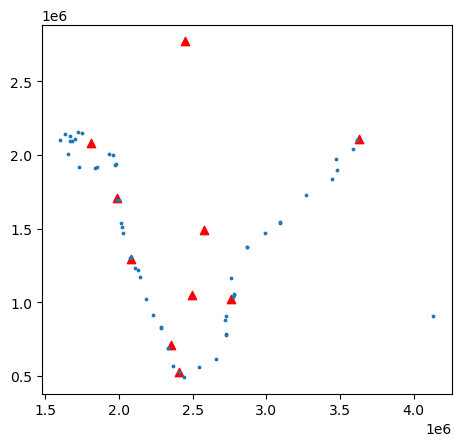

In [55]:
# Filtrar aeropuertos grandes usando la columna 'kind'
largeAirports = airports[airports['type'] == 'large_airport']
largeAirports.reset_index(drop=True, inplace=True)
#plotting
base=largeAirports.plot(color='red',marker="^")
seaports_ind_24383.plot(ax=base,alpha=1,markersize=3)

In [61]:
seaports_ind_24383.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000)

name,Indira Gandhi International Airport,Chhatrapati Shivaji International Airport,Chennai International Airport,Kempegowda International Airport,Netaji Subhash Chandra Bose International Airport,Dabolim Airport,Rajiv Gandhi International Airport,Cochin International Airport,Thiruvananthapuram International Airport,Rajkot International Airport
portName,,,,,,,,,,
Machilipatnam,1461.369200,942.236379,365.747602,495.546641,1058.094799,791.351405,316.155242,840.309367,965.250141,1277.189182
Mandvi,1031.686779,559.171981,1588.734639,1392.629924,1994.068490,956.930320,1144.427342,1598.041114,1788.541018,183.788563
Port Blair,2510.360265,2287.061633,1374.185094,1641.984883,1303.144300,2086.139906,1660.838588,1793.009654,1769.472647,2603.490219
Hazira,966.399643,224.155582,1206.155073,1029.599691,1666.238739,647.085230,749.018032,1278.085614,1471.316565,221.505854
Bedi,997.194118,490.187358,1515.635478,1323.696693,1922.368506,896.414328,1067.445826,1538.141213,1729.549233,106.172843
Mundra,1011.282012,525.928355,1553.371893,1359.615201,1957.159928,928.365833,1106.662577,1569.941097,1760.946665,144.732579
Okha,1079.837716,549.495272,1582.612043,1380.583472,2023.729691,936.706774,1147.516006,1576.341419,1765.909666,205.160471
Veraval,1114.250304,332.580799,1366.279403,1159.826166,1905.165653,715.903609,946.857628,1356.549842,1546.847670,180.287789
Vadinar Terminal,1034.207692,506.359355,1536.483695,1339.761420,1962.435264,904.657554,1094.564971,1545.953228,1736.639286,143.880528
